# Linear Regression

Install de dependencies needed

In [1]:
!pip -q install tensorflow

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

Check the tensorflow version

In [4]:
if tf.__version__ :
    print(tf.__version__)

2.16.1


Load the dataset for the regression

In [11]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


We take our variables for regression

In [13]:
X = np.asanyarray(df[['ENGINESIZE']])
Y = np.asanyarray(df[['CO2EMISSIONS']])
print(X.shape, Y.shape)

(1067, 1) (1067, 1)


We instance the first possible values for $a$ and $b$ in order to get the regression

$$\hat{Y} = a X + b$$

In [14]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)


def h(x):
   y = a*x + b
   return y

We set our loss function, in this case, the MSE

In [15]:
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))

We set our training process using gradient descence with GradientTape

In [16]:
learning_rate = 0.01
train_data = []
loss_values =[]
a_values = []
b_values = []
training_epochs = 200

for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(X)
        loss_value = loss_object(Y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        # compute and adjust weights
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

We show how did the loss values evolved (and reduced)

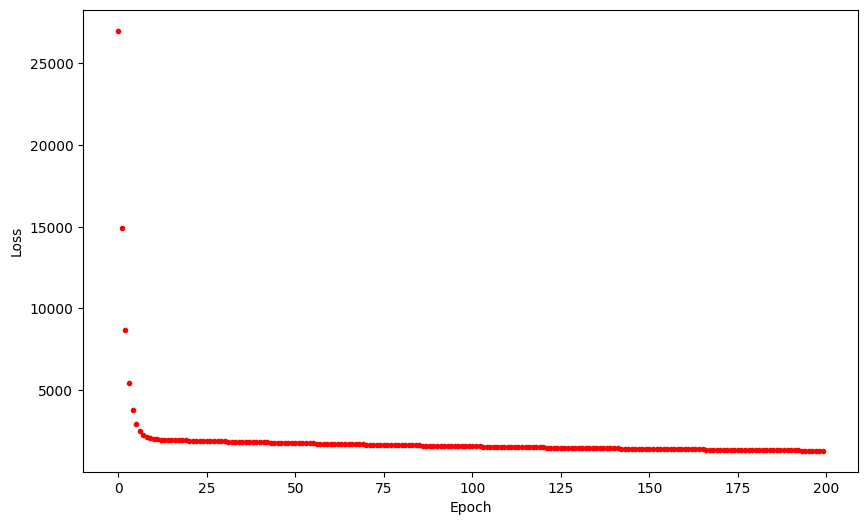

In [21]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'r.')
plt.show()

We look how the solution has evolved letting to the final line (black)

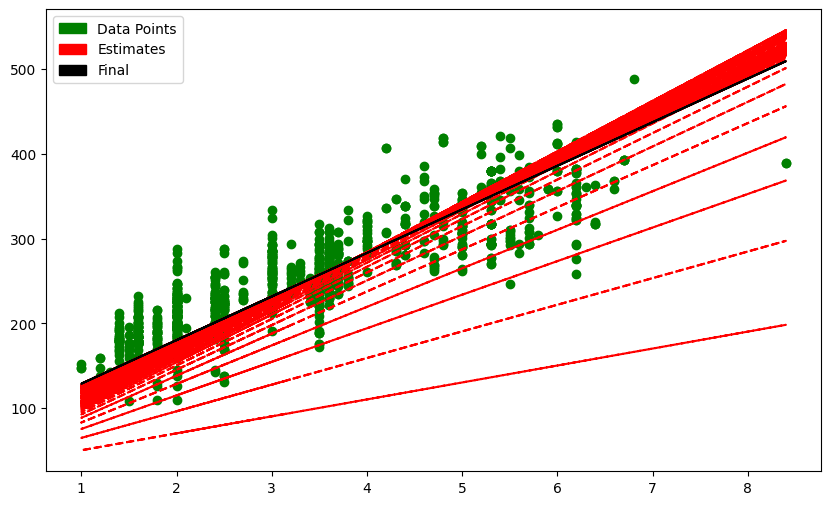

In [23]:
plt.scatter(X,Y, color='green')
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(X,a*X+b, color='red', linestyle='dashed')
plt.plot(X,a_values[-1]*X+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()

Created by <a href="https://linkedin.com/in/romeo-kienzler-089b4557?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01"> Romeo Kienzler </a>, <a href="https://linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01"> Saeed Aghabozorgi </a> , <a href="https://ca.linkedin.com/in/rafaelblsilva?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01"> Rafael Belo Da Silva</a><br>